<a href="https://colab.research.google.com/github/Colsai/DATA-601-Wan/blob/main/DATA601_WK7_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA601 Wan  
## WK7 HW1

### Directions: 
Acquire power data from this source for at least 10 days and not more than 40 days. The website limits the window size, so you will need to download multiple files. Load the data into a Jupyter Notebook. Combine the multiple input files to create a single dataframe.

Create two bar graphs of the power consumption per hour.

- One bar graph has 24 bars; each bar is the average across all days for that hour​   
- one bar graph has 24*(number of days) bars. 
- Your choice of average or sum for each hour. Label the y-axis appropriately.
- Submit the .ipynb file containing the analysis and the generated pictures.​

Include the assignment description in a markdown cell at the top of your notebook.

Source: https://www.bmreports.com/bmrs/?q=demand/rollingsystemdemand

In [20]:
#Import Packages for Use
import pandas as pd
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#The website only allows 7 day collection, so we will important concat two CSV
df_demand1 = pd.read_csv('/content/drive/MyDrive/RollingSystemDemand_2021_1.csv')
df_demand2 = pd.read_csv('/content/drive/MyDrive/RollingSystemDemand_2021_2.csv')

In [22]:
#Quick look at dataframe 1
df_demand1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2001 entries, VD to FTR
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   HDR                    2001 non-null   int64  
 1   ROLLING SYSTEM DEMAND  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 46.9+ KB


In [23]:
#Quick look at dataframe 2
df_demand2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2001 entries, VD to FTR
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   HDR                    2001 non-null   int64  
 1   ROLLING SYSTEM DEMAND  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 46.9+ KB


In [24]:
#What are the values of each of the items?
df_demand1.value_counts()

HDR             ROLLING SYSTEM DEMAND
20210307223500  30572.0                  1
20210303075000  37522.0                  1
20210303064500  29393.0                  1
20210303065000  29695.0                  1
20210303065500  33672.0                  1
                                        ..
20210305153000  38242.0                  1
20210305153500  38238.0                  1
20210305154000  38201.0                  1
20210305154500  38244.0                  1
20210301000000  27035.0                  1
Length: 2000, dtype: int64

Since some of the values have null values in them, I'll drop them here. It will allow an easier conversion to datetime later. 

In [25]:
#Since some of the values are the 
df_demand1 = df_demand1.dropna()
df_demand2 = df_demand2.dropna()

Simple list concat of the two dataframes  
Source: Pandas 1.X Cookbook

In [26]:
#Concat the dataframes
df_list = [df_demand1, df_demand2]
df = pd.concat(df_list)
#df.columns = ["VD", "Time", "Demand"]

In [27]:
#What does the head of the data look like?
df.head()

,HDR,ROLLING SYSTEM DEMAND
VD,20210301000000,27035.0
VD,20210301000500,27069.0
VD,20210301001000,27109.0
VD,20210301001500,27197.0
VD,20210301002000,27248.0


In [28]:
#What does the tail look like?
df.tail()

,HDR,ROLLING SYSTEM DEMAND
VD,20210314221500,27686.0
VD,20210314222000,27396.0
VD,20210314222500,27142.0
VD,20210314223000,26939.0
VD,20210314223500,26797.0


So the format is YYYY-MMDD-??????  
Time markers appear to be in 500 intervals after.

Next step: REF- Notebook 7 Time Series Final

In [29]:
df['HDR']=pd.to_datetime(df['HDR'].astype(str),format='%Y%m%d%H%M%S')

In [30]:
#First element
df.tail()

,HDR,ROLLING SYSTEM DEMAND
VD,2021-03-14 22:15:00,27686.0
VD,2021-03-14 22:20:00,27396.0
VD,2021-03-14 22:25:00,27142.0
VD,2021-03-14 22:30:00,26939.0
VD,2021-03-14 22:35:00,26797.0


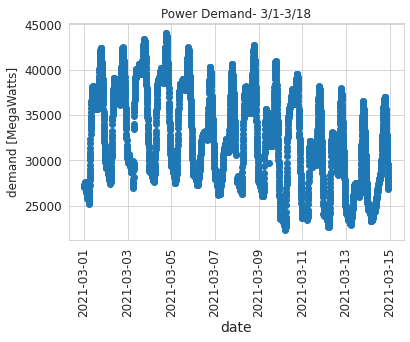

In [31]:
#Starting out trying to graph our data (similar patterns to classwork example)
plt.scatter(x = 'HDR', 
            y = 'ROLLING SYSTEM DEMAND', 
            data = df)

plt.xticks(rotation='vertical')
plt.tick_params(labelsize=12)
plt.title("Power Demand- 3/1-3/18")
plt.xlabel('date',fontsize=14)
plt.ylabel('demand [MegaWatts]',fontsize=12)
plt.show()

Looks like we're getting there. We have all of the data of each day, now we just have to figure out a way to connect the troughs and peaks per day. 

https://stackoverflow.com/questions/33227473/how-to-set-the-range-of-y-axis-for-a-seaborn-boxplot

In [32]:
import matplotlib.ticker as ticker

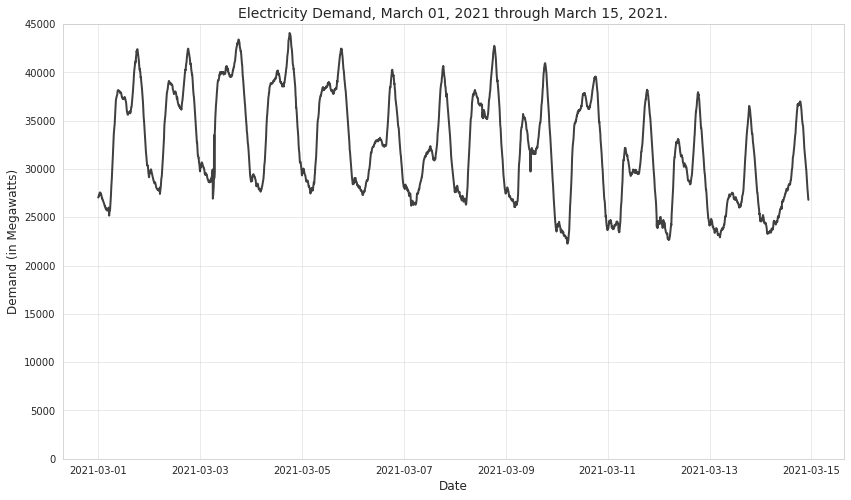

In [33]:
#Let's visualize this in seaborn for a nicer-looking visualization

fig, ax = plt.subplots(figsize = (14,8))
sns.set_style("whitegrid")
ax.grid(alpha = .5)

sns.lineplot(x = 'HDR', y="ROLLING SYSTEM DEMAND", data = df, alpha = .75, color = 'black', linewidth = 2)

ax.set_title("Electricity Demand, March 01, 2021 through March 15, 2021.", size = 14)
ax.set_xlabel("Date", size = 12)
ax.set_ylabel("Demand (in Megawatts)", size = 12)
ax.set_yscale("linear")

#Change the minimum, so that scales from 0
ax.set(ylim=(0, 4.5e4))
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))

Bar Graphs

In [34]:
df.groupby(df['HDR'].dt.day).agg("mean")

,ROLLING SYSTEM DEMAND
HDR,
1,33984.649306
2,35063.420139
3,36126.416667
4,35634.614583
5,35039.145833
6,32103.458333
7,31498.154412
8,33933.798611
9,31766.062500


Date Aggregation: https://stackoverflow.com/questions/11391969/how-to-group-pandas-dataframe-entries-by-date-in-a-non-unique-column
Rounding date values up for labeling: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.round.html


In [35]:
df_days = df.set_index('HDR').resample("D")["ROLLING SYSTEM DEMAND"].mean().reset_index()
df_days['HDR'] = df_days['HDR'].dt.round("H")

df_hours =  df.set_index('HDR').resample("H")["ROLLING SYSTEM DEMAND"].mean().reset_index()

In [36]:
df_days

,HDR,ROLLING SYSTEM DEMAND
0,2021-03-01,33984.649306
1,2021-03-02,35063.420139
2,2021-03-03,36126.416667
3,2021-03-04,35634.614583
4,2021-03-05,35039.145833
5,2021-03-06,32103.458333
6,2021-03-07,31498.154412
7,2021-03-08,33933.798611
8,2021-03-09,31766.062500
9,2021-03-10,31560.076389


#Part 2:
Average across all hours...
- One bar graph has 24 bars; each bar is the average across all days for that hour​   
- one bar graph has 24*(number of days) bars. 
- Your choice of average or sum for each hour. Label the y-axis appropriately.
- Submit the .ipynb file containing the analysis and the generated pictures.​

In [38]:
df['Hour'] = [elem.hour for elem in df['HDR']]

To aggregate values easier,  I will add and return two items to the dataframe (to preserve the dataframe, I could also extract the elements into a new dataframe)

In [39]:
df.sample(5)

,HDR,ROLLING SYSTEM DEMAND,Hour
VD,2021-03-13 15:15:00,26747.0,15
VD,2021-03-05 01:50:00,28987.0,1
VD,2021-03-11 21:20:00,31147.0,21
VD,2021-03-13 23:05:00,26283.0,23
VD,2021-03-04 09:55:00,38871.0,9


In [40]:
df_byhour = df.groupby("Hour", as_index = False).agg("sum")

In [41]:
df_byhour.columns

Index(['Hour', 'ROLLING SYSTEM DEMAND'], dtype='object')

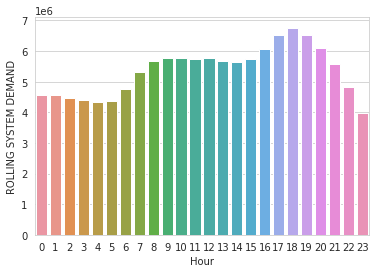

In [42]:
sns.barplot(x = 'Hour',y = 'ROLLING SYSTEM DEMAND', data = df_byhour)

Let's make the visualization a little more clear, and add some labels to each bar:  

ref- https://wellsr.com/python/seaborn-barplot-tutorial-for-python/

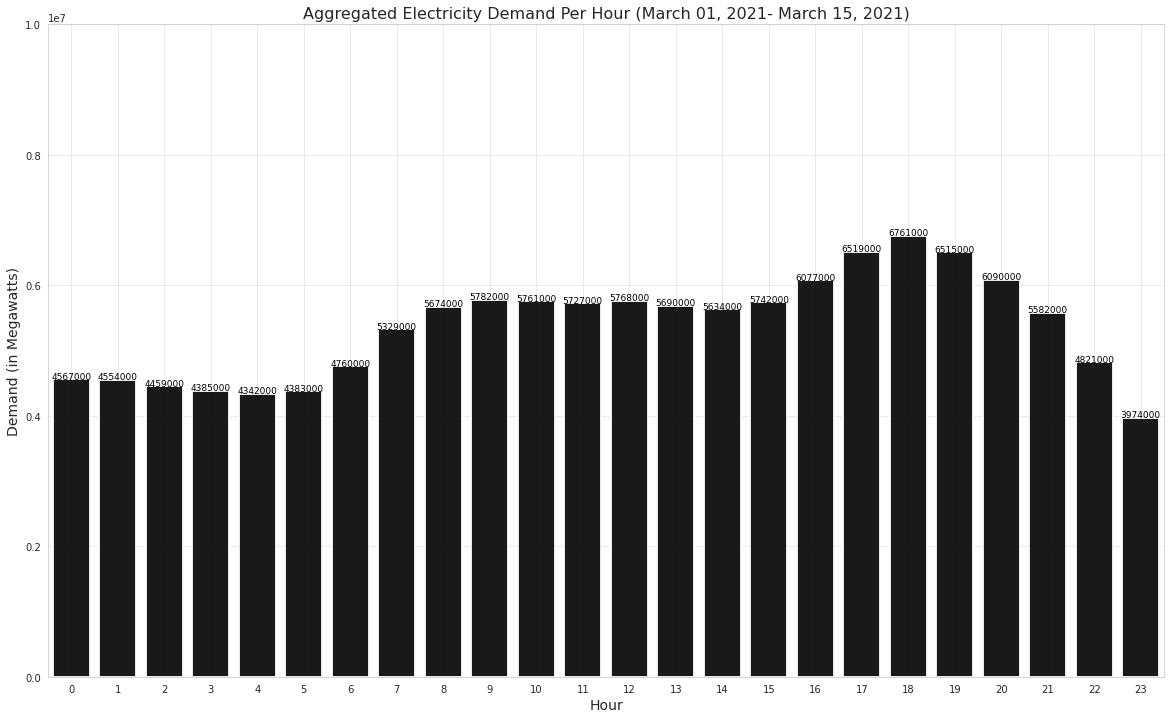

In [132]:
#Styles
fig, ax = plt.subplots(1, figsize = (20,12))
sns.set_style("whitegrid")

#Barplot Call
sns.barplot(x = 'Hour', 
            y="ROLLING SYSTEM DEMAND",
            data = df_byhour, 
            alpha = .9, 
            color = 'black',  
            linewidth = 2,  
            dodge = True)

#Grid and Text Information
ax.grid(alpha = .5, axis = 'both')
ax.set_title("Aggregated Electricity Demand Per Hour (March 01, 2021- March 15, 2021)", size = 16)
ax.set_xlabel("Hour", size = 14)
ax.set_ylabel("Demand (in Megawatts)", size = 14)
ax.set_yscale("linear")

#Change the minimum, so that scales from 0
ax.set(ylim=(0, 1e7))

for index, row in df_byhour.iterrows():
    ax.text(row.Hour,row['ROLLING SYSTEM DEMAND'], int(round(row['ROLLING SYSTEM DEMAND'],-3)), color='black', ha="center", size = 9)

In [104]:
df_byhour.describe()

,Hour,ROLLING SYSTEM DEMAND
count,24.000000,2.400000e+01
mean,11.500000,5.370679e+06
std,7.071068,7.914301e+05
min,0.000000,3.973699e+06
25%,5.750000,4.564171e+06
50%,11.500000,5.653710e+06
75%,17.250000,5.771571e+06
max,23.000000,6.761490e+06


**Analysis:**
Morning ahours between 23 (11:00pm) to 5 (5am) appear to have the lowest times of energy consumption, where 6-18 (6:00am to 6pm), we mostly see an increase and higher energy comsumptions, with slight droppoffs after the morning hours.  

Over the two-week period sampled, the 23rd hour (11:00pm) appears to be the lowest usage of electricity, and 18th hour (6:00pm) appears to be the highest. Average usage per hour is about 5.37e6 megawatts.

In [61]:
#Sanity Check- How many bars?
24*14

336

In [63]:
df.head()

,HDR,ROLLING SYSTEM DEMAND,Hour
VD,2021-03-01 00:00:00,27035.0,0
VD,2021-03-01 00:05:00,27069.0,0
VD,2021-03-01 00:10:00,27109.0,0
VD,2021-03-01 00:15:00,27197.0,0
VD,2021-03-01 00:20:00,27248.0,0


Using resample to aggregate hours:   
ref: https://towardsdatascience.com/how-to-group-data-by-different-time-intervals-using-python-pandas-eb7134f9b9b0

In [75]:
df_hours_by_day = df.resample('H', on='HDR')["ROLLING SYSTEM DEMAND"].agg(["mean", "sum"])

In [79]:
#Reset index so we can call it for graphing
df_hours_by_day = df_hours_by_day.reset_index()

Found a very cool code snippet to display every nth label. 
Here, I'll set it to 12.   
ref: https://stackoverflow.com/questions/20337664/cleanest-way-to-hide-every-nth-tick-label-in-matplotlib-colorbar

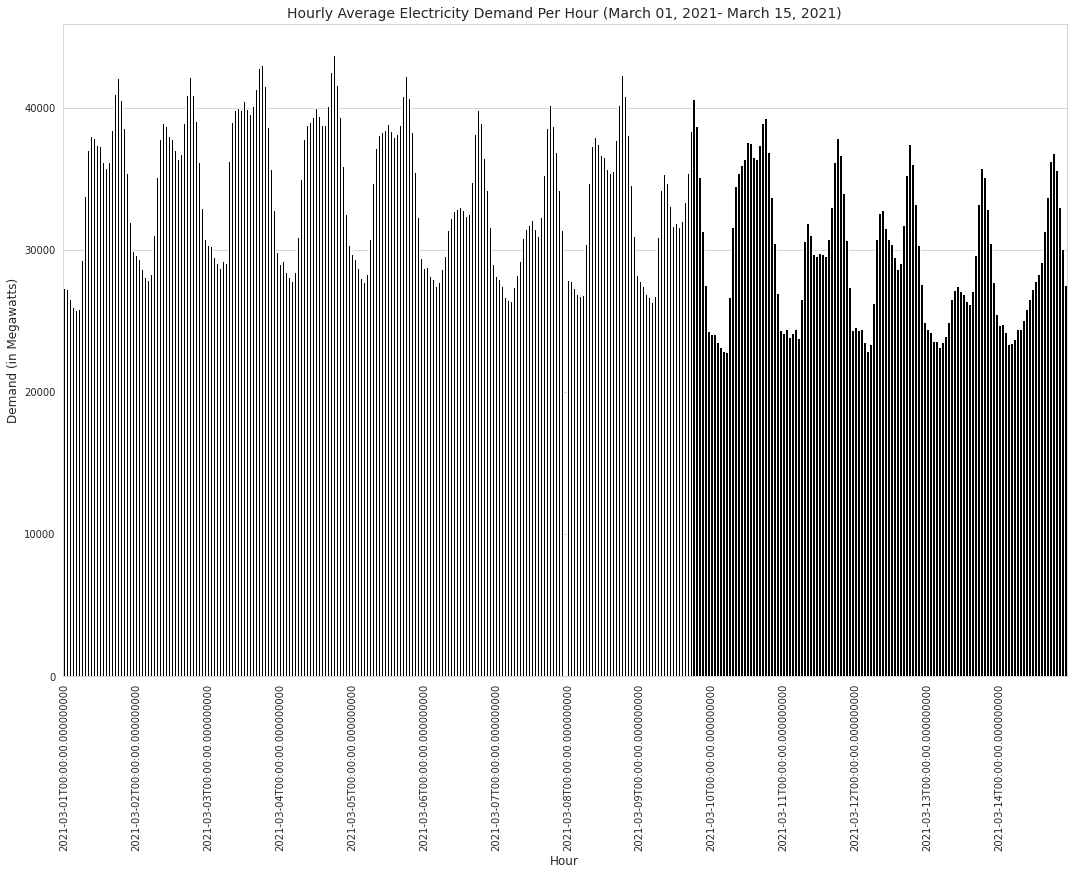

In [131]:
fig, ax = plt.subplots(1, figsize = (18,12))
sns.set_style("whitegrid")

#Barplot Call
sns.barplot(x = 'HDR', 
            y="mean",
            data = df_hours_by_day, 
            color = 'black')

#Grid and Text Information
ax.set_title("Hourly Average Electricity Demand Per Hour (March 01, 2021- March 15, 2021)", size = 14)
ax.set_xlabel("Hour", size = 12)
ax.set_ylabel("Demand (in Megawatts)", size = 12)
#ax.set_yscale("linear")

plt.xticks(rotation='vertical')

#Code for nth labels
temp = ax.xaxis.get_ticklabels()
temp = list(set(temp) - set(temp[::24]))

for label in temp:
    label.set_visible(False)

plt.show()